In [1]:
from google.colab import files
uploaded = files.upload()

Saving SupplyChainEmissionFactorsforUSIndustriesCommodities2015_Summary.xlsx to SupplyChainEmissionFactorsforUSIndustriesCommodities2015_Summary.xlsx


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the uploaded Excel file (auto-detect filename)
import io

# Get the filename from the uploaded dictionary
file_name = list(uploaded.keys())[0]
df = pd.read_excel(io.BytesIO(uploaded[file_name]), sheet_name="Sheet1")

In [6]:
# Data Cleaning
df = df[df["Supply Chain Emission Factors with Margins"].apply(pd.to_numeric, errors='coerce').notnull()]
df = df.drop_duplicates()
df["Supply Chain Emission Factors with Margins"] = df["Supply Chain Emission Factors with Margins"].astype(float)

# Visualization Setup
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

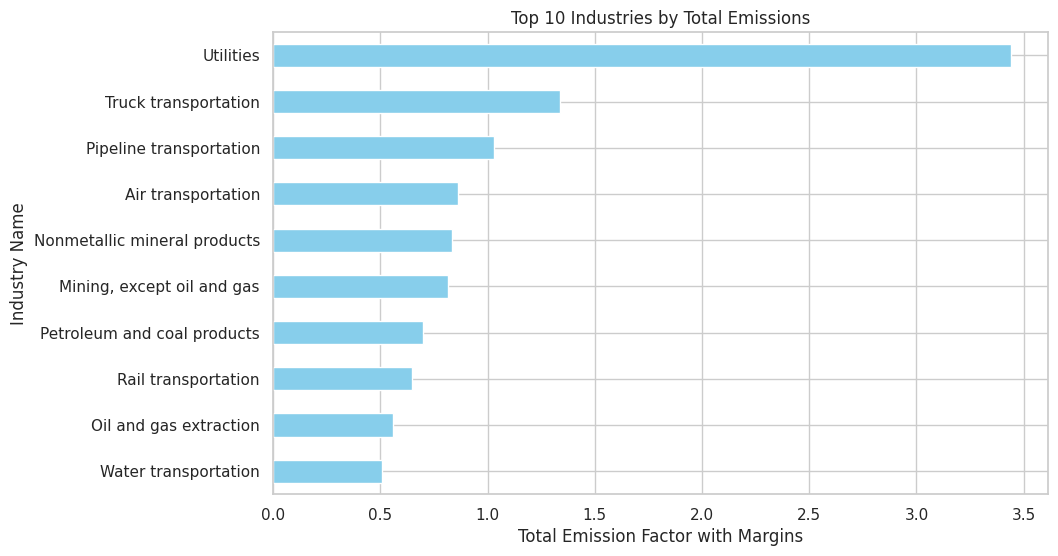

In [7]:
# 1. Bar chart: Top 10 industries by total emissions
top_industries = df.groupby("Industry Name")["Supply Chain Emission Factors with Margins"].sum().nlargest(10)
top_industries.plot(kind="barh", title="Top 10 Industries by Total Emissions", color="skyblue")
plt.xlabel("Total Emission Factor with Margins")
plt.gca().invert_yaxis()
plt.show()

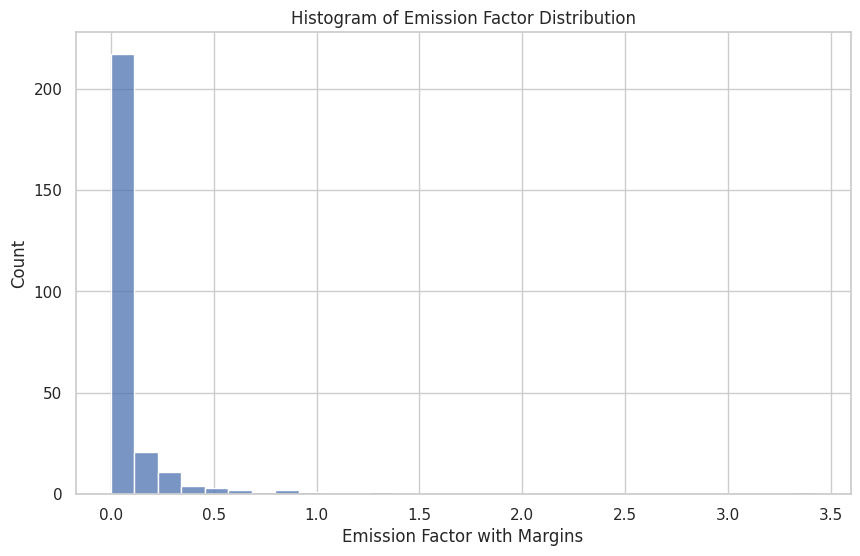

In [8]:
# 2. Histogram of emissions
sns.histplot(df["Supply Chain Emission Factors with Margins"], bins=30)
plt.title("Histogram of Emission Factor Distribution")
plt.xlabel("Emission Factor with Margins")
plt.show()

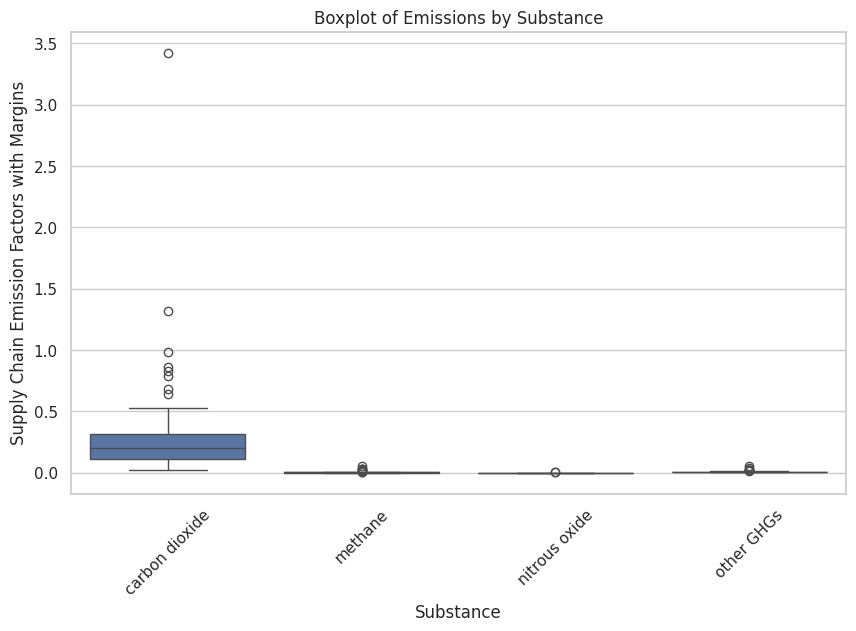

In [9]:
# 3. Boxplot by Substance
sns.boxplot(x="Substance", y="Supply Chain Emission Factors with Margins", data=df)
plt.title("Boxplot of Emissions by Substance")
plt.xticks(rotation=45)
plt.show()

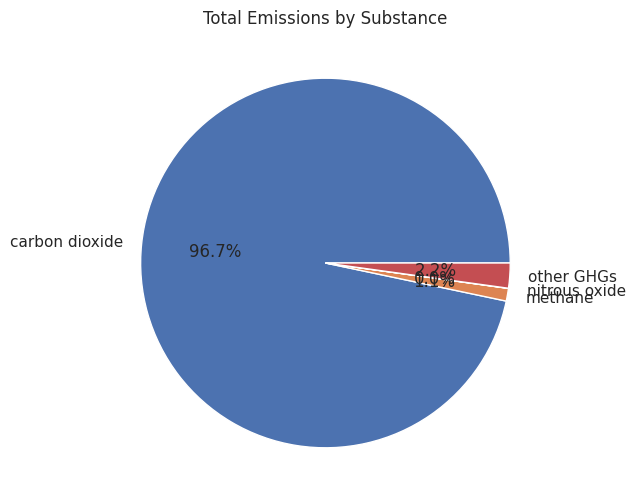

In [10]:
# 4. Pie chart of total emissions by substance
emissions_by_substance = df.groupby("Substance")["Supply Chain Emission Factors with Margins"].sum()
plt.pie(emissions_by_substance, labels=emissions_by_substance.index, autopct='%1.1f%%')
plt.title("Total Emissions by Substance")
plt.show()


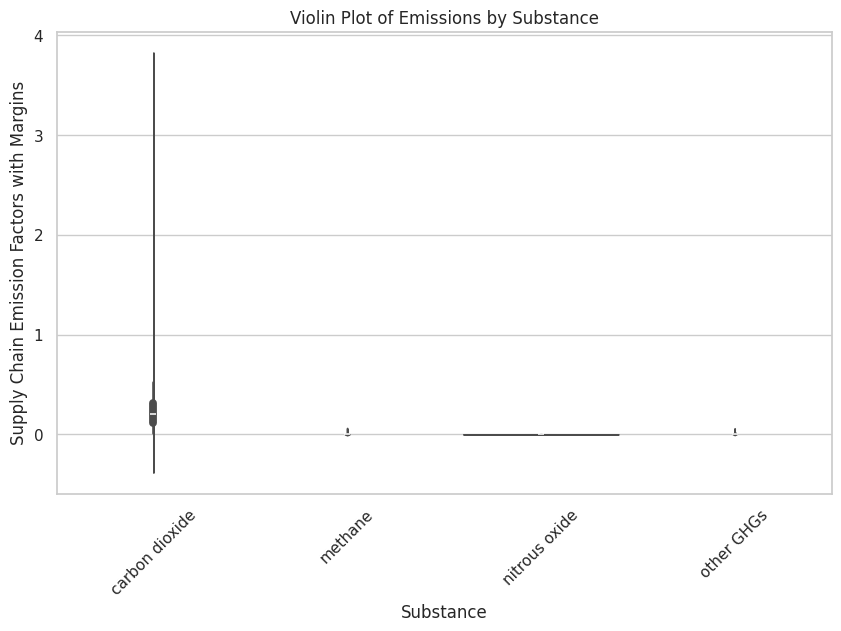

In [11]:
# 5. Violin plot
sns.violinplot(x="Substance", y="Supply Chain Emission Factors with Margins", data=df)
plt.title("Violin Plot of Emissions by Substance")
plt.xticks(rotation=45)
plt.show()


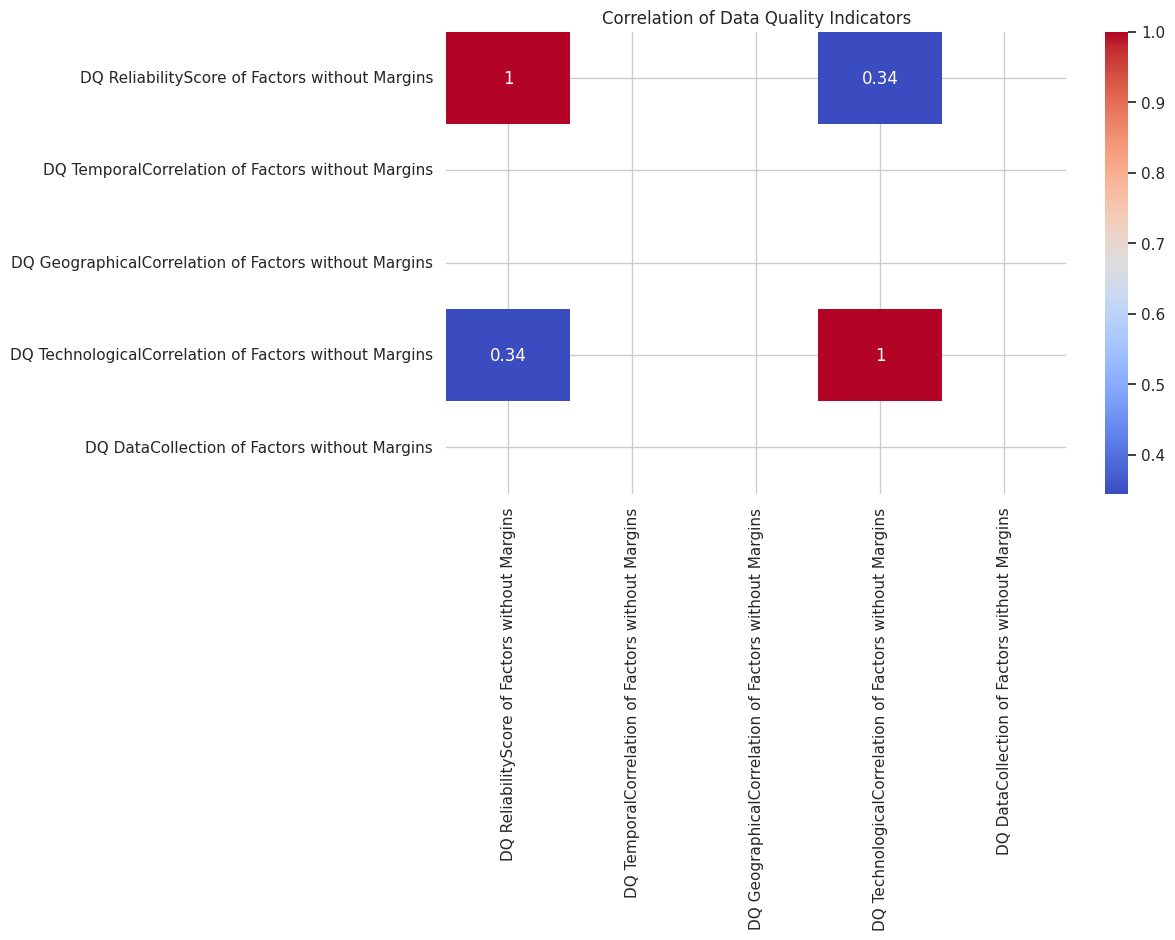

In [12]:
# 6. Correlation heatmap of data quality indicators
dq_cols = [col for col in df.columns if "DQ" in col]
df_dq = df[dq_cols].apply(pd.to_numeric, errors="coerce")
sns.heatmap(df_dq.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation of Data Quality Indicators")
plt.show()

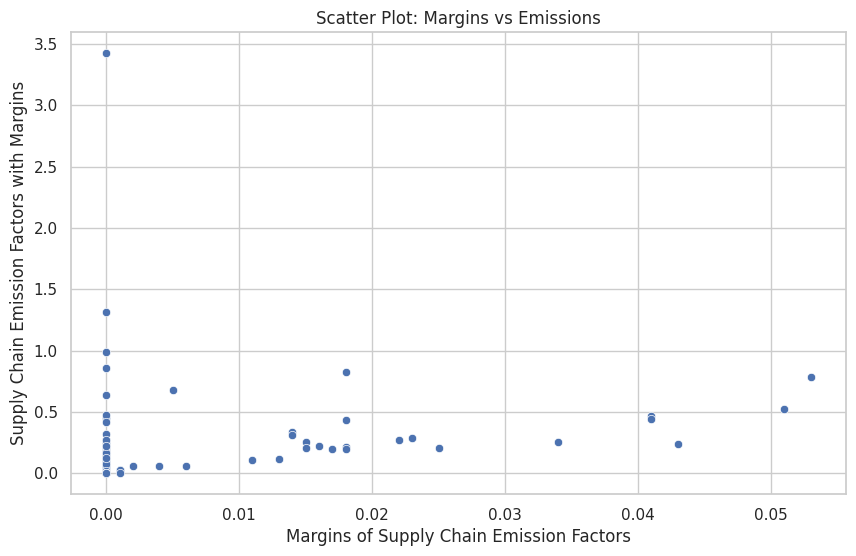

In [13]:
# 7. Scatter plot: Margins vs Emissions
sns.scatterplot(x="Margins of Supply Chain Emission Factors", y="Supply Chain Emission Factors with Margins", data=df)
plt.title("Scatter Plot: Margins vs Emissions")
plt.show()

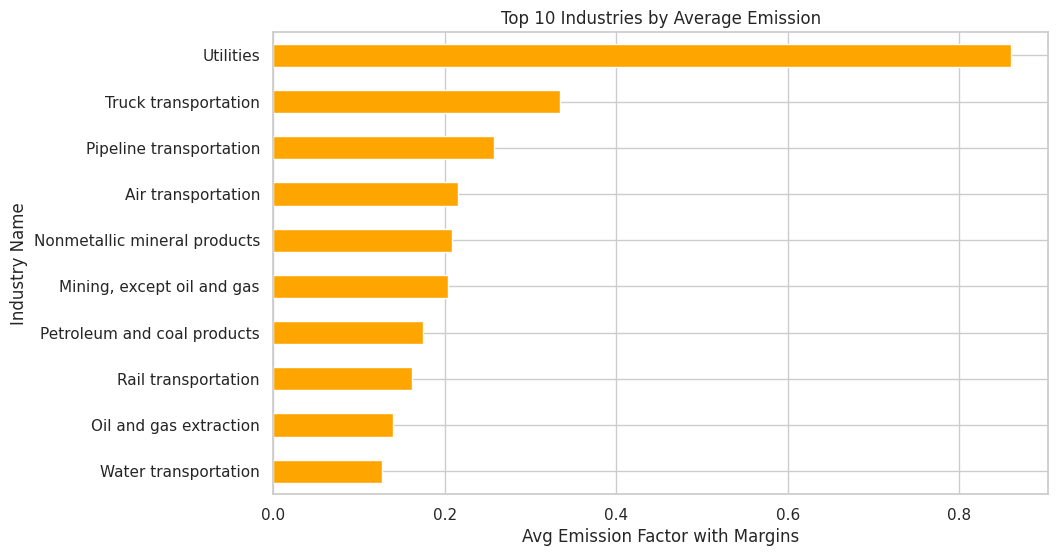

In [15]:
# 8. Horizontal bar: Avg emission by industry
avg_emissions = df.groupby("Industry Name")["Supply Chain Emission Factors with Margins"].mean().nlargest(10)
avg_emissions.sort_values().plot(kind='barh', title="Top 10 Industries by Average Emission", color="orange")
plt.xlabel("Avg Emission Factor with Margins")
plt.show()

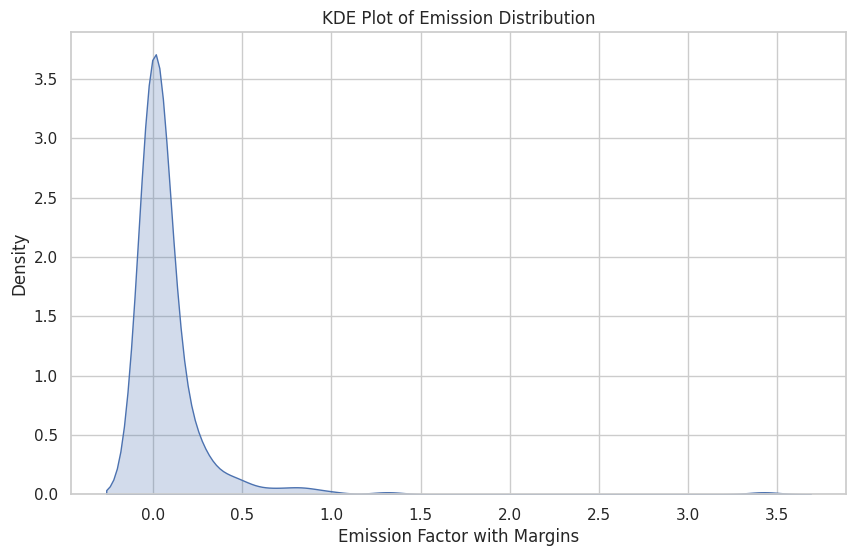

In [17]:
# 9. KDE Plot: Density of emission values
sns.kdeplot(df["Supply Chain Emission Factors with Margins"], fill=True)
plt.title("KDE Plot of Emission Distribution")
plt.xlabel("Emission Factor with Margins")
plt.show()